## 学习曲线

### 什么是学习曲线？
    - 学习曲线是一种检验模型泛化能力的方式
    - 以训练样本个数为横轴，模型性能为纵轴，分别绘制训练数据和测试数据性能随着训练样本个数的变化曲线
    - 一般来说样本小的时候，训练数据性能好，测试数据性能差
    - 当样本数据增大，训练数据的性能逐渐减小，测试数据性能逐渐增加，样本数量增大到一定程度，训练数据和测试数据的性能趋于稳定
    - 一般训练数据的性能要始终优于测试数据
    - 欠拟合时候，训练数据和测试数据稳定于性能较差的位置
    - 过拟合的时候，训练数据和测试数据的性能虽然在处于较低位置，但两者差距较大
    
### 另一种反映模型泛化能力的曲线
    - 以模型复杂度为横轴，不同的算法模型的复杂度的指征不一样，如KNN复杂度与K相关，K越小模型越复杂，多项式回归与degree有关，degree越大越复杂
    - 以模型性能为纵轴，度量指标有MSE，RMSE，R方等
    - 分别绘制训练数据和测试数据的性能随着模型复杂度的变化曲线
    - 一般训练数据的性能随着模型复杂度的增加而增加
    - 而测试数据的性能则是先增加，再减小

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

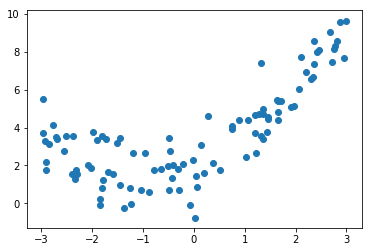

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape

(75, 1)

In [5]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot(range(1, len(X_train)+1), np.sqrt(train_score), label="train")
    plt.plot(range(1, len(X_train)+1), np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

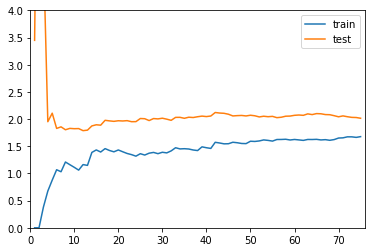

In [6]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

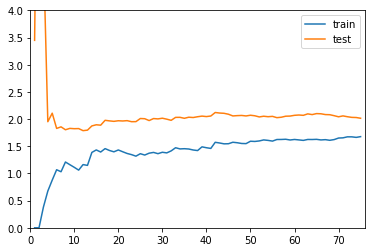

In [7]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [8]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
def PolynomialRegression(degree):
    return Pipeline([
            ('ploynomial_features', PolynomialFeatures(degree=degree)),
            ('standard_scaler', StandardScaler()),
            ('linear_regression', LinearRegression())
            ])

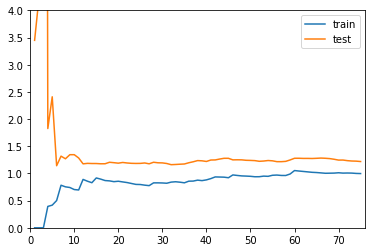

In [10]:
poly2_reg = PolynomialRegression(2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

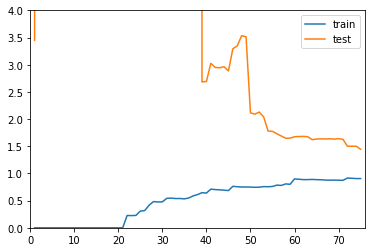

In [11]:
poly20_reg = PolynomialRegression(20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)